In [1]:
import pymc3 as pm
import numpy as np
import theano
from collections import defaultdict
import seaborn as sns

sns.set_context('poster')
sns.set_style('white')
%matplotlib inline

In [12]:
# Set up a pilot experiment with n=2
loc = 10
size = 2

vals = np.random.normal(loc=loc, scale=1, size=size)
print(vals)
obs = theano.shared(vals)

with pm.Model() as model:
    mu = pm.Uniform('mu', lower=-10000, upper=10000)
    sd = pm.Exponential('sd', lam=10)
    likelihood = pm.Normal('like', mu=mu, sd=sd, observed=obs)
    params = pm.variational.advi(n=100000)
    trace = pm.variational.sample_vp(params, draws=5000)

[ 9.48172346  8.21508634]
Applied interval-transform to mu and added transformed mu_interval_ to model.
Applied log-transform to sd and added transformed sd_log_ to model.
Iteration 0 [0%]: ELBO = -66113943309.58
Iteration 10000 [10%]: Average ELBO = -2479602891.7
Iteration 20000 [20%]: Average ELBO = -694227.29
Iteration 30000 [30%]: Average ELBO = -301.15
Iteration 40000 [40%]: Average ELBO = -41.36
Iteration 50000 [50%]: Average ELBO = -22.15
Iteration 60000 [60%]: Average ELBO = -19.77
Iteration 70000 [70%]: Average ELBO = -19.63
Iteration 80000 [80%]: Average ELBO = -19.66
Iteration 90000 [90%]: Average ELBO = -19.7
Finished [100%]: Average ELBO = -19.55


/Users/ericmjl/anaconda/envs/writing/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


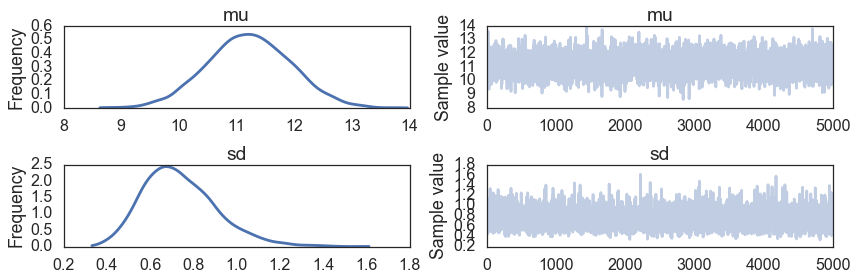

In [6]:
import matplotlib.pyplot as plt 

with model:
    pm.traceplot(trace)
    plt.legend()

In [8]:
def hpd_range(trace, key, perc=95):
    lowperc = (100 - perc) / 2
    uppperc = 100 - (lowperc)
    lower, upper = np.percentile(trace[key], [lowperc, uppperc])
    rng = upper - lower
    return rng

def ratio_uncertainty_to_value(trace, key):
    # lower, upper = np.percentile(trace[key], [2.5, 97.5])
    density = hpd_range(trace, key)
    return density / np.mean(trace[key])



hpd_range(trace, 'mu'), ratio_uncertainty_to_value(trace, 'mu')

(2.8685539017739323, 0.2556508100695411)

In [9]:
# Now, let's add some data.
more_obs = np.concatenate([np.random.normal(loc=loc, scale=1, size=3),
                           vals],
                         axis=0)
print(more_obs)
obs = obs.set_value(more_obs)

[ 10.43019218  10.18190227   8.48630163   9.94214179  11.07352695]
